In [23]:
from cloudvolume import CloudVolume
from skimage.transform import downscale_local_mean
import napari
from skimage import io
import random
import h5py
from skimage import measure
from brainlit.preprocessing import removeSmallCCs
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import ticker
import subprocess
import tables
from scipy.stats import gaussian_kde, kstest
from scipy import stats
from tqdm import tqdm
%gui qt5

<KeysViewHDF5 ['exported_data']>
<KeysViewHDF5 ['exported_data']>
(1555,)
(1480,)
<KeysViewHDF5 ['exported_data']>
<KeysViewHDF5 ['exported_data']>
(1876,)
(4465,)
<KeysViewHDF5 ['exported_data']>
<KeysViewHDF5 ['exported_data']>
(973,)
(1440,)


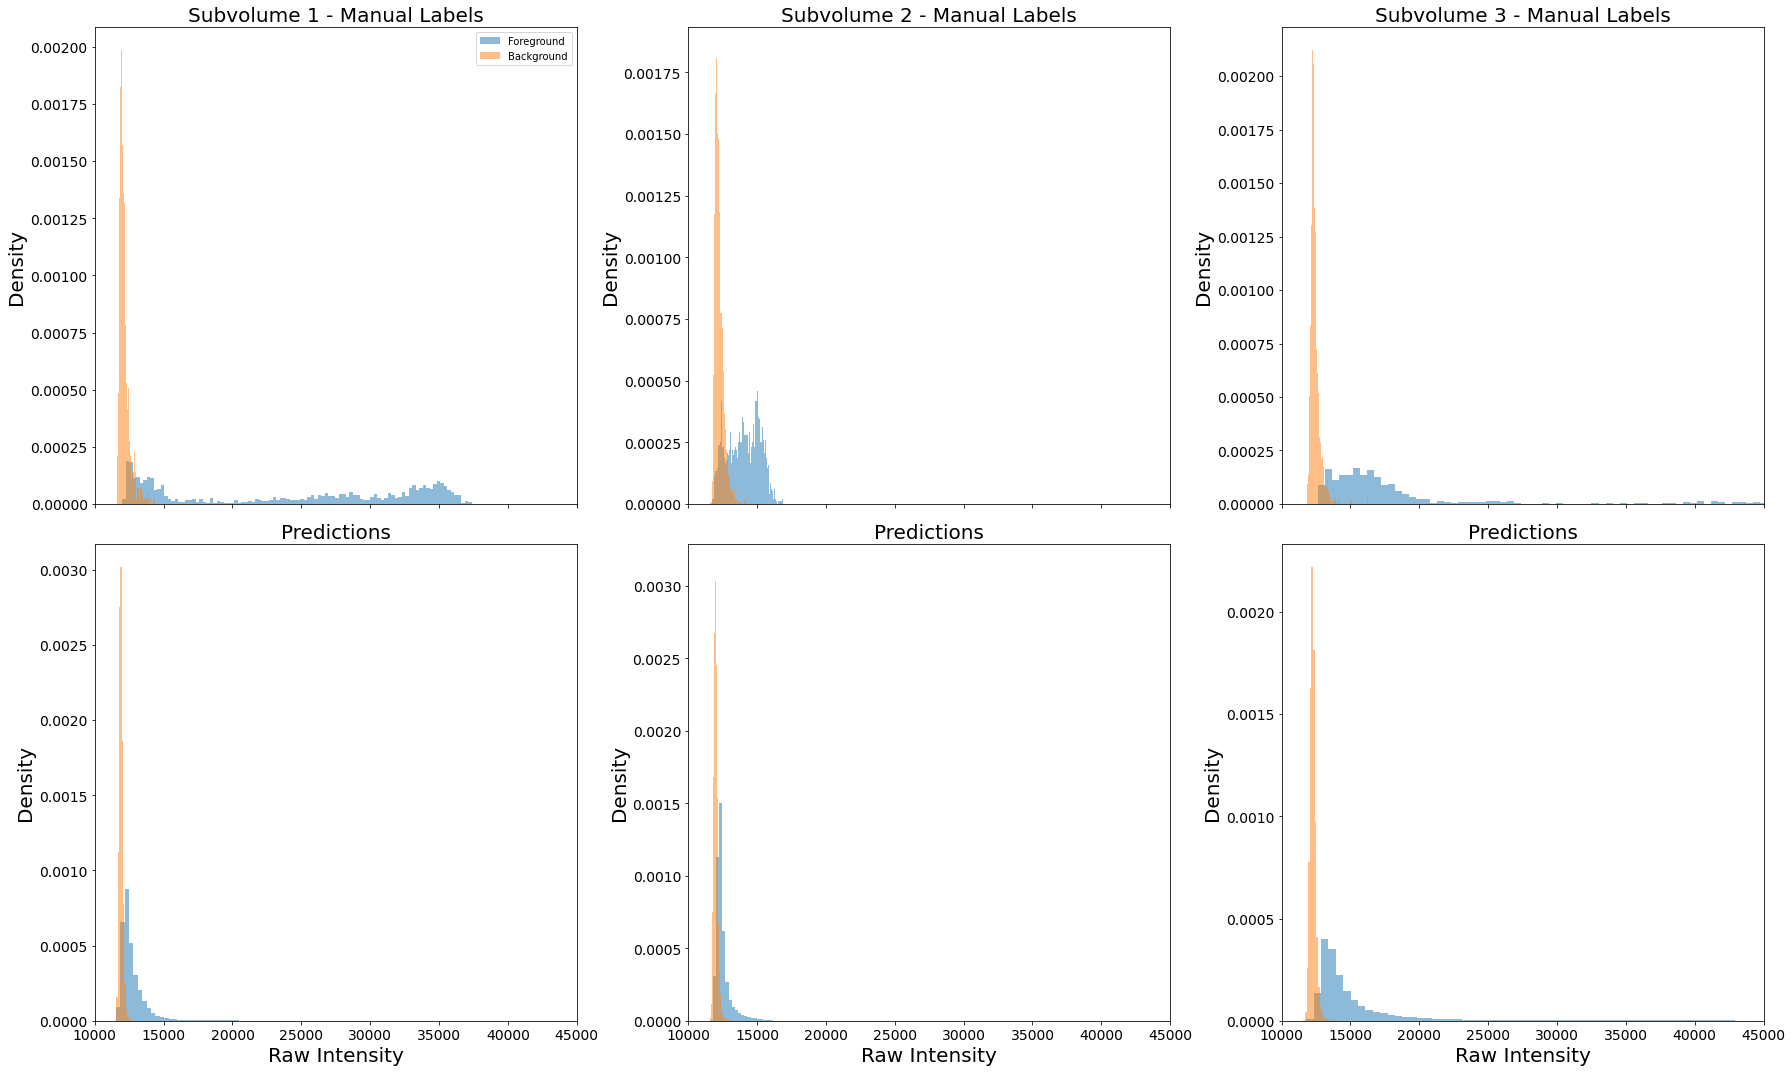

In [3]:

fig, axs = plt.subplots(2,3)
for i in range(10,13):
    ax1 = axs[0, i-10]
    ax2 = axs[1, i-10]

    fname = "/Users/thomasathey/Documents/mimlab/mouselight/octopus_experiment/ilastik_training/2018-08-01_" + str(i) + "_octopus.tif"
    im = io.imread(fname)

    fname = "/Users/thomasathey/Documents/mimlab/mouselight/octopus_experiment/ilastik_training/2018-08-01_" + str(i) + "_octopus_Labels.h5"
    with h5py.File(fname, 'r') as f:
        print(f.keys())
        labels = f['exported_data']
        labels = labels[:,:,:,0]

    fname = "/Users/thomasathey/Documents/mimlab/mouselight/octopus_experiment/ilastik_training/2018-08-01_" + str(i) + "_octopus_Simple Segmentation.h5"
    with h5py.File(fname, 'r') as f:
        print(f.keys())
        pred = f['exported_data']
        pred = pred[:,:,:,0]

    fg_lab = im[labels == 2]
    print(fg_lab.shape)
    bg_lab = im[labels == 1]
    print(bg_lab.shape)
    fg_pred = im[pred == 2]
    bg_pred = im[pred == 1]

    _, bs1, _ = ax1.hist(fg_lab, bins=100, label='Foreground', alpha=0.5, density=True)
    ax2.hist(fg_pred, bins=100, label= 'Foreground', alpha=0.5, density=True)
    _, bs2, _ = ax1.hist(bg_lab, bins=100, label='Background', alpha=0.5, density=True)
    ax2.hist(bg_pred, bins=100, label='Background', alpha=0.5, density=True)
    
    ax2.set_xlabel("Raw Intensity", fontsize=20)
    ax1.set_xlim([10000,45000])
    ax1.set_xticklabels([])
    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax2.tick_params(axis='both', which='major', labelsize=14)
    ax2.set_xlim([10000,45000])

    ax1.set_ylabel("Density", fontsize=20)
    ax2.set_ylabel("Density", fontsize=20)

    ax1.set_title("Subvolume " + str(i-9) + " - Manual Labels", fontsize=20)
    ax2.set_title("Predictions", fontsize=20)
axs[0,0].legend()
fig.set_figheight(15)
fig.set_figwidth(25)
fig.tight_layout()

<KeysViewHDF5 ['exported_data']>
<KeysViewHDF5 ['exported_data']>
Labeled Foreground p-val norm: 0.0, p-val poisson: 1.8276984180389393e-245
Labeled Background p-val norm: 0.0, p-val poisson: 7.460554771206806e-100
Predicted Foreground p-val norm: 0.0, p-val poisson: 0.0
Predicted Background p-val norm: 0.0, p-val poisson: 4.141736530192356e-07
<KeysViewHDF5 ['exported_data']>
<KeysViewHDF5 ['exported_data']>
Labeled Foreground p-val norm: 0.0, p-val poisson: 1.7516428586759357e-162
Labeled Background p-val norm: 0.0, p-val poisson: 1.63672353836749e-75
Predicted Foreground p-val norm: 0.0, p-val poisson: 2.2777539288403857e-181
Predicted Background p-val norm: 0.0, p-val poisson: 2.0433966954060784e-06
<KeysViewHDF5 ['exported_data']>
<KeysViewHDF5 ['exported_data']>
Labeled Foreground p-val norm: 0.0, p-val poisson: 0.0
Labeled Background p-val norm: 0.0, p-val poisson: 4.620954487701326e-74
Predicted Foreground p-val norm: 0.0, p-val poisson: 0.0
Predicted Background p-val norm: 0.0

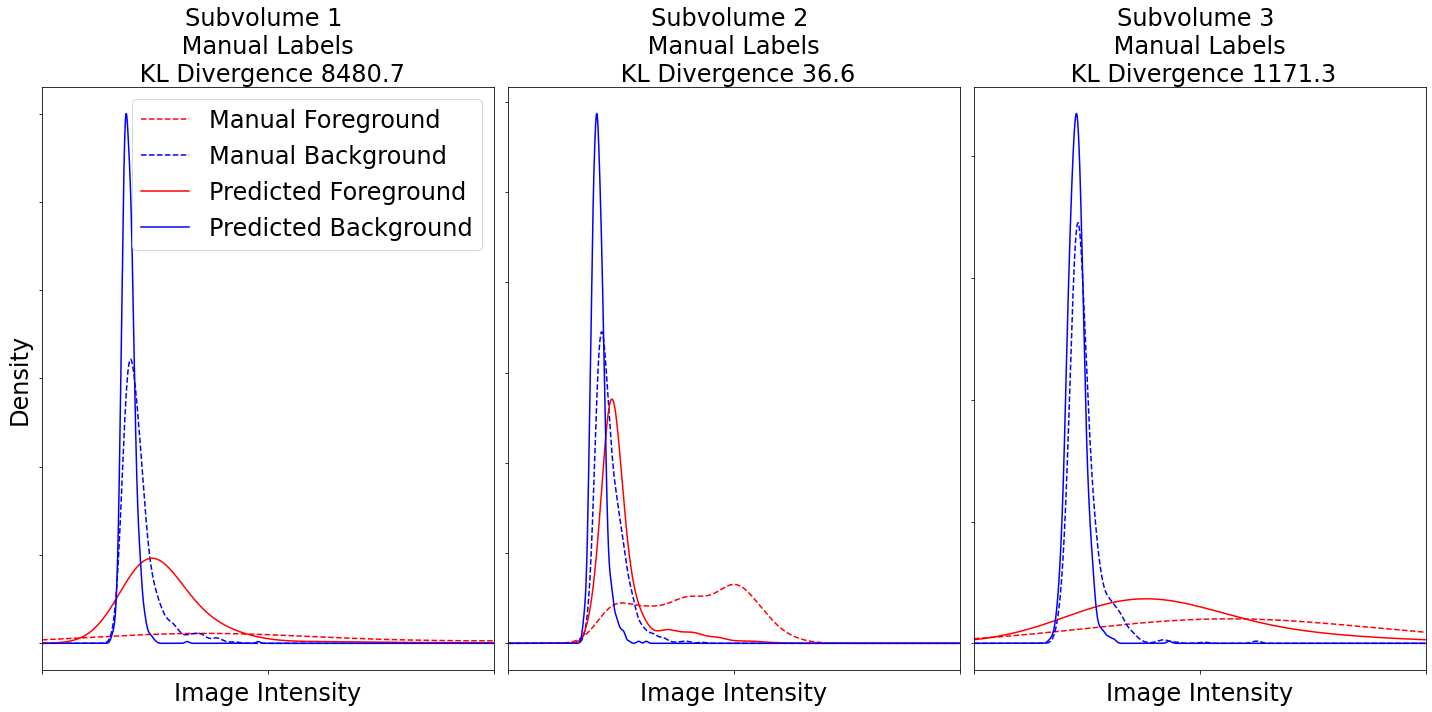

In [9]:

fig, axs = plt.subplots(1,3)
for i in range(10,13):
    ax1 = axs[i-10]
    #ax2 = axs[1, i-10]

    fname = "/Users/thomasathey/Documents/mimlab/mouselight/octopus_experiment/ilastik_training/2018-08-01_" + str(i) + "_octopus.tif"
    im = io.imread(fname)

    fname = "/Users/thomasathey/Documents/mimlab/mouselight/octopus_experiment/ilastik_training/2018-08-01_" + str(i) + "_octopus_Labels.h5"
    with h5py.File(fname, 'r') as f:
        print(f.keys())
        labels = f['exported_data']
        labels = labels[:,:,:,0]

    fname = "/Users/thomasathey/Documents/mimlab/mouselight/octopus_experiment/ilastik_training/2018-08-01_" + str(i) + "_octopus_Simple Segmentation.h5"
    with h5py.File(fname, 'r') as f:
        print(f.keys())
        pred = f['exported_data']
        pred = pred[:,:,:,0]

    fg_lab = im[labels == 2].flatten()
    np.random.shuffle(fg_lab)
    fg_lab = fg_lab[:900]
    _, p_norm = kstest(fg_lab, "norm")
    _, p_poisson = kstest(fg_lab, "poisson", args = (np.mean(fg_lab),))
    print(f"Labeled Foreground p-val norm: {p_norm}, p-val poisson: {p_poisson}")
    bg_lab = im[labels == 1].flatten()
    np.random.shuffle(bg_lab)
    bg_lab = bg_lab[:900]
    _, p_norm = kstest(bg_lab, "norm")
    _, p_poisson = kstest(bg_lab, "poisson", args = (np.mean(bg_lab),))
    print(f"Labeled Background p-val norm: {p_norm}, p-val poisson: {p_poisson}")

    fg_pred = im[pred == 2].flatten()
    np.random.shuffle(fg_pred)
    fg_pred = fg_pred[:900]
    _, p_norm = kstest(fg_pred, "norm")
    _, p_poisson = kstest(fg_pred, "poisson", args = (np.mean(fg_pred),))
    print(f"Predicted Foreground p-val norm: {p_norm}, p-val poisson: {p_poisson}")
    bg_pred = im[pred == 1].flatten()
    np.random.shuffle(bg_pred)
    bg_pred = bg_pred[:900]
    _, p_norm = kstest(bg_pred, "norm")
    _, p_poisson = kstest(bg_pred, "poisson", args = (np.mean(bg_pred),))
    print(f"Predicted Background p-val norm: {p_norm}, p-val poisson: {p_poisson}")

    ts = np.arange(10000, 40000, 1)

    kde_fg = gaussian_kde(fg_lab)
    ax1.plot(ts, kde_fg.evaluate(ts), 'r--', label="Manual Foreground")

    kde_bg = gaussian_kde(bg_lab)
    ax1.plot(ts, kde_bg.evaluate(ts), 'b--', label="Manual Background")

    kl_div_lab = np.sum(np.multiply(kde_fg.pdf(ts), kde_fg.logpdf(ts) - kde_bg.logpdf(ts)))

    kde_fg = gaussian_kde(fg_pred)
    ax1.plot(ts, kde_fg.evaluate(ts), 'r-', label="Predicted Foreground")

    kde_bg = gaussian_kde(bg_pred)
    ax1.plot(ts, kde_bg.evaluate(ts), 'b-', label="Predicted Background")

    kl_div_pred = np.sum(np.multiply(kde_fg.pdf(ts), kde_fg.logpdf(ts) - kde_bg.logpdf(ts)))
    
    ax1.set_xlabel("Image Intensity", fontsize=24)

    # if i == 10:
    #     xmax = 40000
    # elif i == 11:
    #     xmax = 20000
    # elif i == 12:
    xmax = 20000


    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax1.set_xlim([10000,xmax])
    ax1.set_xticks([10000, (xmax+10000)/2, xmax])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])

    # ax2.tick_params(axis='both', which='major', labelsize=14)
    # ax2.set_xlim([10000,xmax])
    # ax2.set_xticks([10000, (xmax+10000)/2, xmax])
    # ax2.set_xticklabels([])
    # ax2.set_yticklabels([])
    if i == 10:
        ax1.set_ylabel("Density", fontsize=24)
        #ax2.set_ylabel("Density", fontsize=24)
    else:
        ax1.set_ylabel("")
        #ax2.set_ylabel("")


    ax1.set_title(f"Subvolume {i-9} \n Manual Labels \n KL Divergence {kl_div_lab:.1f}", fontsize=24)
    #ax2.set_title(f"Predictions \n KL Divergence: {kl_div_pred:.1f}", fontsize=24)
axs[0].legend(prop={'size': 24})
fig.set_figheight(10)
fig.set_figwidth(20)
fig.tight_layout()

<KeysViewHDF5 ['exported_data']>
<KeysViewHDF5 ['exported_data']>
Predicted Foreground p-val norm: 0.0, p-val poisson: 0.0
Predicted Background p-val norm: 0.0, p-val poisson: 8.00775260144324e-14
<KeysViewHDF5 ['exported_data']>
<KeysViewHDF5 ['exported_data']>
Predicted Foreground p-val norm: 0.0, p-val poisson: 0.0
Predicted Background p-val norm: 0.0, p-val poisson: 1.3327205916065592e-21
<KeysViewHDF5 ['exported_data']>
<KeysViewHDF5 ['exported_data']>
Predicted Foreground p-val norm: 0.0, p-val poisson: 0.0
Predicted Background p-val norm: 0.0, p-val poisson: 1.7431415013491221e-96


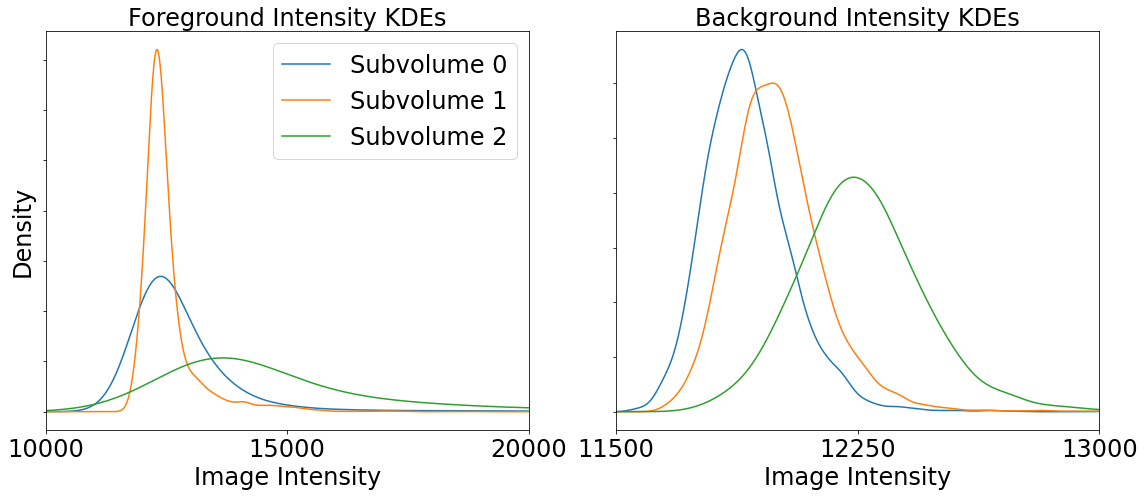

In [66]:

fig, axs = plt.subplots(1,2)
ax_fg = axs[0]
ax_bg = axs[1]

colors = ['r', 'b', 'g']

for i in range(10,13):
    #ax2 = axs[1, i-10]

    fname = "/Users/thomasathey/Documents/mimlab/mouselight/octopus_experiment/ilastik_training/2018-08-01_" + str(i) + "_octopus.tif"
    im = io.imread(fname)

    fname = "/Users/thomasathey/Documents/mimlab/mouselight/octopus_experiment/ilastik_training/2018-08-01_" + str(i) + "_octopus_Labels.h5"
    with h5py.File(fname, 'r') as f:
        print(f.keys())
        labels = f['exported_data']
        labels = labels[:,:,:,0]

    fname = "/Users/thomasathey/Documents/mimlab/mouselight/octopus_experiment/ilastik_training/2018-08-01_" + str(i) + "_octopus_Simple Segmentation.h5"
    with h5py.File(fname, 'r') as f:
        print(f.keys())
        pred = f['exported_data']
        pred = pred[:,:,:,0]

    # fg_lab = im[labels == 2].flatten()
    # np.random.shuffle(fg_lab)
    # fg_lab = fg_lab[:900]
    # _, p_norm = kstest(fg_lab, "norm")
    # _, p_poisson = kstest(fg_lab, "poisson", args = (np.mean(fg_lab),))
    # print(f"Labeled Foreground p-val norm: {p_norm}, p-val poisson: {p_poisson}")
    # bg_lab = im[labels == 1].flatten()
    # np.random.shuffle(bg_lab)
    # bg_lab = bg_lab[:900]
    # _, p_norm = kstest(bg_lab, "norm")
    # _, p_poisson = kstest(bg_lab, "poisson", args = (np.mean(bg_lab),))
    # print(f"Labeled Background p-val norm: {p_norm}, p-val poisson: {p_poisson}")

    fg_pred = im[pred == 2].flatten()
    np.random.shuffle(fg_pred)
    fg_pred = fg_pred[:5000]
    _, p_norm = kstest(fg_pred, "norm")
    _, p_poisson = kstest(fg_pred, "poisson", args = (np.mean(fg_pred),))
    print(f"Predicted Foreground p-val norm: {p_norm}, p-val poisson: {p_poisson}")
    bg_pred = im[pred == 1].flatten()
    np.random.shuffle(bg_pred)
    bg_pred = bg_pred[:5000]
    _, p_norm = kstest(bg_pred, "norm")
    _, p_poisson = kstest(bg_pred, "poisson", args = (np.mean(bg_pred),))
    print(f"Predicted Background p-val norm: {p_norm}, p-val poisson: {p_poisson}")

    ts = np.arange(10000, 40000, 1)



    kde_fg = gaussian_kde(fg_pred, bw_method="scott")
    ax_fg.plot(ts, kde_fg.evaluate(ts), label=f"Subvolume {i-10}")

    kde_bg = gaussian_kde(bg_pred, bw_method="scott")
    ax_bg.plot(ts, kde_bg.evaluate(ts))

    kl_div_pred = np.sum(np.multiply(kde_fg.pdf(ts), kde_fg.logpdf(ts) - kde_bg.logpdf(ts)))
    kl_div_lab = np.sum(np.multiply(kde_fg.pdf(ts), kde_fg.logpdf(ts) - kde_bg.logpdf(ts)))
    


xmax = 20000
ax_fg.tick_params(axis='both', which='major', labelsize=14)
ax_fg.set_xlim([10000,xmax])
ax_fg.set_xticks([10000, (xmax+10000)/2, xmax])
ax_fg.set_xticklabels([10000, int((xmax+10000)/2), xmax], fontdict={'fontsize': 24})
ax_fg.set_yticklabels([])
ax_fg.set_ylabel("Density", fontsize=24)
ax_fg.set_xlabel("Image Intensity", fontsize=24)
ax_fg.set_title(f"Foreground Intensity KDEs", fontsize=24)

xmax = 13000
xmin = 11500
ax_bg.tick_params(axis='both', which='major', labelsize=14)
ax_bg.set_xlim([xmin,xmax])
ax_bg.set_xticks([xmin, (xmax+xmin)/2, xmax])
ax_bg.set_xticklabels([xmin, int((xmax+xmin)/2), xmax], fontdict={'fontsize': 24})
ax_bg.set_yticklabels([])
ax_bg.set_xlabel("Image Intensity", fontsize=24)
ax_bg.set_title(f"Background Intensity KDEs", fontsize=24)

ax_fg.legend(prop={'size': 24})
fig.set_figheight(7)
fig.set_figwidth(16)
fig.tight_layout()

Loading data...
<KeysViewHDF5 ['exported_data']>
<KeysViewHDF5 ['exported_data']>
Finding coordinates...
Finding Intensities...
Mean intensity: 11965.3548 variance: 16957.43091696 of 5000 Background voxels


100%|██████████| 21/21 [00:00<00:00, 34.65it/s]


Finding coordinates...
Finding Intensities...
Mean intensity: 12637.2498 variance: 302217.66339996003 of 5000 Foreground voxels


100%|██████████| 21/21 [00:00<00:00, 32.76it/s]


Loading data...
<KeysViewHDF5 ['exported_data']>
<KeysViewHDF5 ['exported_data']>
Finding coordinates...
Finding Intensities...
Mean intensity: 11954.8526 variance: 12372.75687324 of 5000 Background voxels


100%|██████████| 21/21 [00:00<00:00, 37.45it/s]


Finding coordinates...
Finding Intensities...
Mean intensity: 12239.1804 variance: 84855.93985583998 of 5000 Foreground voxels


100%|██████████| 21/21 [00:00<00:00, 34.99it/s]


Loading data...
<KeysViewHDF5 ['exported_data']>
<KeysViewHDF5 ['exported_data']>
Finding coordinates...
Finding Intensities...
Mean intensity: 12306.5244 variance: 33926.01460464 of 5000 Background voxels


100%|██████████| 21/21 [00:00<00:00, 35.88it/s]


Finding coordinates...
Finding Intensities...
Mean intensity: 13311.5842 variance: 299729.19131036 of 5000 Foreground voxels


100%|██████████| 21/21 [00:00<00:00, 34.01it/s]


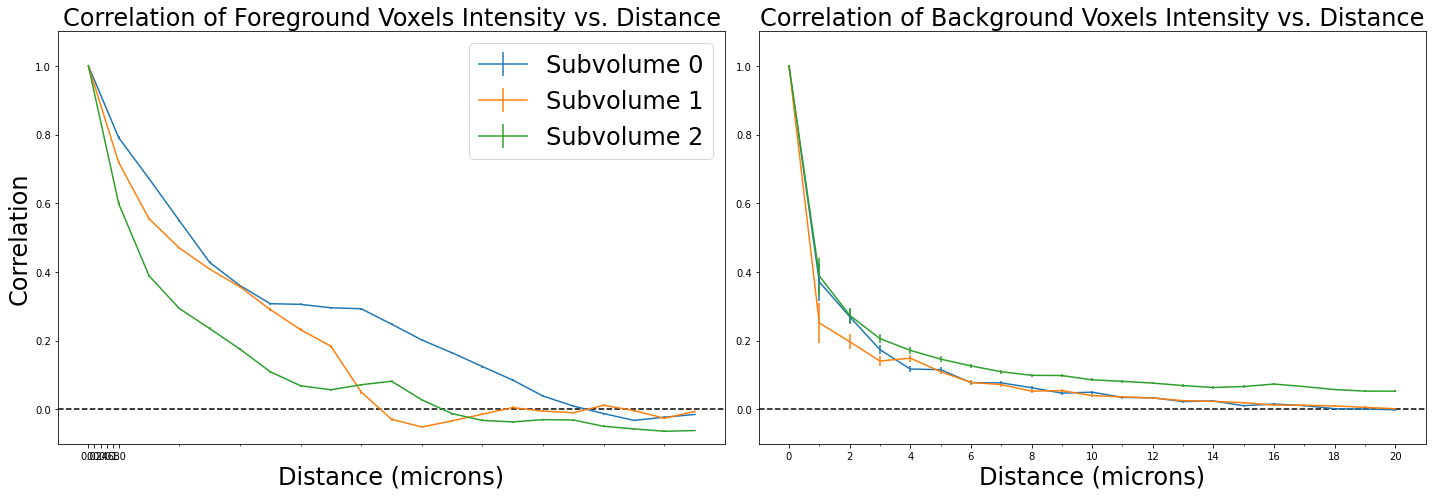

In [51]:
num_samples = 5000

fig, axs = plt.subplots(1,2)
ax_fg = axs[0]
ax_bg = axs[1]

min_cor = 0

data = np.zeros((3,2,3,21)) #subvolume, voxel type, cor/error, data

for i in range(10,13):
    print("Loading data...")
    fname = "/Users/thomasathey/Documents/mimlab/mouselight/octopus_experiment/ilastik_training/2018-08-01_" + str(i) + "_octopus.tif"
    im = io.imread(fname)

    fname = "/Users/thomasathey/Documents/mimlab/mouselight/octopus_experiment/ilastik_training/2018-08-01_" + str(i) + "_octopus_Labels.h5"
    with h5py.File(fname, 'r') as f:
        print(f.keys())
        labels = f['exported_data']
        labels = labels[:,:,:,0]

    
    fname = "/Users/thomasathey/Documents/mimlab/mouselight/octopus_experiment/ilastik_training/2018-08-01_" + str(i) + "_octopus_Simple Segmentation.h5"
    with h5py.File(fname, 'r') as f:
        print(f.keys())
        pred = f['exported_data']
        pred = pred[:,:,:,0]

    labels = pred[:125,:125,:125]

    for val, type in zip([1, 2],["Background", "Foreground"]):
        
        print("Finding coordinates...")
        coords = np.argwhere(labels == val)
        coords = [coord for coord in coords]
        random.shuffle(coords)
        coords = coords[:num_samples]

        print("Finding Intensities...")
        ints = []
        for coord in coords:
            ints.append(im[coord[0],coord[1],coord[2]])
        mean_int = np.mean(ints)
        var_int = np.var(ints)
        print(f"Mean intensity: {mean_int} variance: {var_int} of {len(coords)} {type} voxels")

        pairs_bg = [(c1, c2) for idx, c1 in enumerate(coords) for c2 in coords[idx:]]


        dists = []
        diffs = []
        for pair in tqdm(pairs_bg, desc="Computing Correlations"):
            dist = np.linalg.norm(np.multiply(pair[0]-pair[1], [0.3,0.3,1]))
            dists.append(dist)
            a = float(im[pair[0][0],pair[0][1],pair[0][2]]) - mean_int
            b = float(im[pair[1][0],pair[1][1],pair[1][2]]) - mean_int
            diffs.append(a*b)

        diffs = np.array(diffs)
        dists = np.array(dists)

        cor = []
        errors = []
        for dist in tqdm(np.arange(0,21,1)):
            idxs = np.logical_and(dists <= dist, dists > dist-1)
            dif_select = diffs[idxs]
            mn = np.mean(dif_select)
            correlation = mn/var_int
            z_plus = 0.5*np.log((1+correlation)/(1-correlation))+1/np.sqrt(len(dif_select)-3)
            z_minus = 0.5*np.log((1+correlation)/(1-correlation))-1/np.sqrt(len(dif_select)-3)
            e_plus = (np.exp(2*z_plus)-1)/(np.exp(2*z_plus)+1) - correlation
            e_minus = correlation - (np.exp(2*z_minus)-1)/(np.exp(2*z_minus)+1)
            errors.append([e_minus, e_plus])
            cor.append(correlation)
            #print(f"Distance {dist}, samples: {len(dif_select)} cor: {correlation}")

        if np.amin(cor) < min_cor:
            min_cor = np.amin(cor)
            
        errors = np.array(errors).T

        data[i-10, val-1, 0, :] = cor
        data[i-10, val-1, 1:, :] = errors

        if val == 1:
            ax_bg.errorbar(np.arange(0,21,1), cor, yerr=errors, label=f"Subvolume {i-10}")
        else:
            ax_fg.errorbar(np.arange(0,21,1), cor, yerr=errors, label=f"Subvolume {i-10}")

min_y = round(min_cor,1)
if min_y > min_cor:
    min_y -= 0.1

#y axis
ax_fg.set_ylim([min_y,1.1])
ax_fg.set_yticks(np.arange(0,1.2,0.2))
ax_fg.set_yticklabels(np.arange(0,1.2,0.2), fontdict={'fontsize': 24})
ax_fg.set_ylabel("Correlation", fontsize=24)

#x axis
ax_fg.set_xlabel("Distance (microns)", fontsize=24)
ax_fg.set_xlim([-1,21])
ax_fg.set_xticks(np.arange(0,22,2), minor=False)
ax_fg.set_xticks(np.arange(1,21,2), minor=True)
ax_fg.set_xticklabels(np.arange(0,22,2), fontdict={'fontsize': 24})

#other
ax_fg.set_title(f"Correlation of Foreground Voxels Intensity vs. Distance", fontsize=24)
ax_fg.legend(prop={'size': 24})
ax_fg.axhline(0, linestyle='--', color='k') # horizontal lines

#y axis
ax_bg.set_ylim([min_y,1.1])
ax_bg.set_yticks(np.arange(0,1.2,0.2))
ax_bg.set_yticklabels(np.arange(0,1.2,0.2), fontdict={'fontsize': 24})

#x axis
ax_bg.set_xlabel("Distance (microns)", fontsize=24)
ax_bg.set_xlim([-1,21])
ax_bg.set_xticks(np.arange(0,22,2), minor=False)
ax_bg.set_xticks(np.arange(1,21,2), minor=True)
ax_bg.set_xticklabels(np.arange(0,22,2), fontdict={'fontsize': 24})

#other
ax_bg.set_title(f"Correlation of Background Voxels Intensity vs. Distance", fontsize=24)
ax_bg.axhline(0, linestyle='--', color='k') # horizontal lines

fig.set_figheight(7)
fig.set_figwidth(20)
fig.tight_layout()

In [42]:
viewer = napari.Viewer(ndisplay=3)
viewer.add_image(im[:125,:125,:125], scale=[0.3,0.3,1])


<Image layer 'Image' at 0x1c3b6fa60>

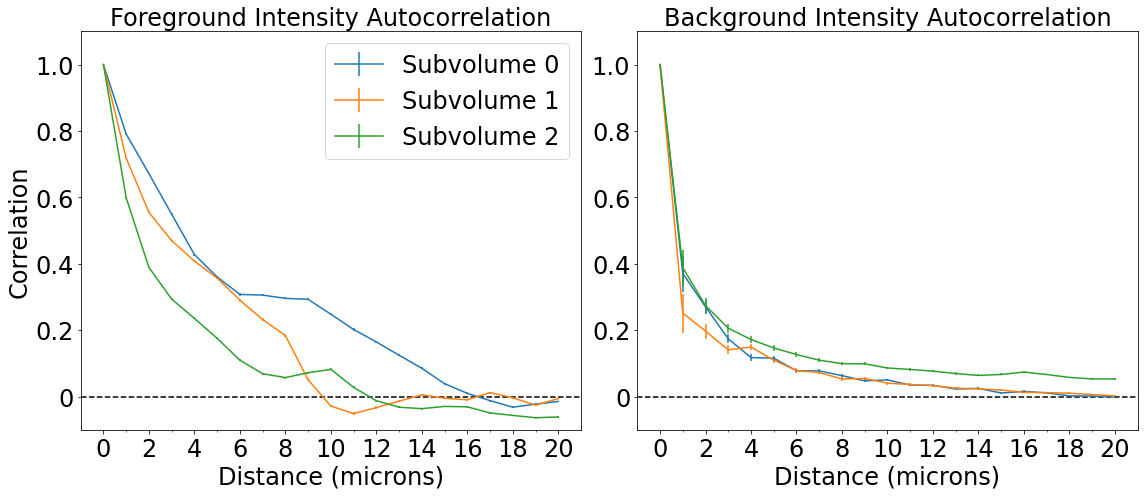

In [60]:
num_samples = 5000

fig, axs = plt.subplots(1,2)
ax_fg = axs[0]
ax_bg = axs[1]

min_cor = np.amin(data[:,:,0,:])

for i in range(10,13):
    for val, type in zip([1, 2],["Background", "Foreground"]):
        cor = data[i-10, val-1, 0, :]
        errors = data[i-10, val-1, 1:, :]
        if val == 1:
            ax_bg.errorbar(np.arange(0,21,1), cor, yerr=errors, label=f"Subvolume {i-10}")
        else:
            ax_fg.errorbar(np.arange(0,21,1), cor, yerr=errors, label=f"Subvolume {i-10}")

min_y = round(min_cor,1)
if min_y > min_cor:
    min_y -= 0.1
    
#y axis
ax_fg.set_ylim([min_y,1.1])
ax_fg.set_yticks(np.arange(0,1.2,0.2))
ax_fg.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontdict={'fontsize': 24})
ax_fg.set_ylabel("Correlation", fontsize=24)

#x axis
ax_fg.set_xlabel("Distance (microns)", fontsize=24)
ax_fg.set_xlim([-1,21])
ax_fg.set_xticks(np.arange(0,22,2), minor=False)
ax_fg.set_xticks(np.arange(1,21,2), minor=True)
ax_fg.set_xticklabels(np.arange(0,22,2), fontdict={'fontsize': 24})

#other
ax_fg.set_title(f"Foreground Intensity Autocorrelation", fontsize=24)
ax_fg.legend(prop={'size': 24})
ax_fg.axhline(0, linestyle='--', color='k') # horizontal lines

#y axis
ax_bg.set_ylim([min_y,1.1])
ax_bg.set_yticks(np.arange(0,1.2,0.2))
ax_bg.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontdict={'fontsize': 24})

#x axis
ax_bg.set_xlabel("Distance (microns)", fontsize=24)
ax_bg.set_xlim([-1,21])
ax_bg.set_xticks(np.arange(0,22,2), minor=False)
ax_bg.set_xticks(np.arange(1,21,2), minor=True)
ax_bg.set_xticklabels(np.arange(0,22,2), fontdict={'fontsize': 24})

#other
ax_bg.set_title(f"Background Intensity Autocorrelation", fontsize=24)
ax_bg.axhline(0, linestyle='--', color='k') # horizontal lines

fig.set_figheight(7)
fig.set_figwidth(16)
fig.tight_layout()